In [227]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

In [228]:
df=pd.DataFrame()
df['X1']=[1,2,3,4,5,6,6,7,9,9]
df['X2']=[5,3,6,8,1,9,5,8,9,2]
df['label']=[1,1,0,1,0,1,0,1,0,0]

In [229]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

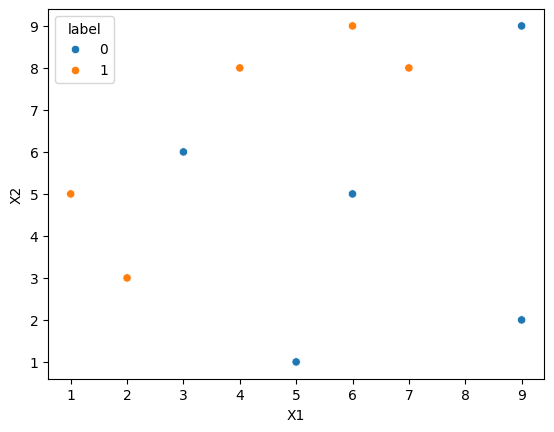

In [230]:
import seaborn as sns
sns.scatterplot(x=df['X1'], y=df['X2'], hue=df['label'])

In [231]:
# step 1 assign weights to all of dps and 

df['weights']=1/df.shape[0]

In [232]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [233]:
# step 2: predict using thye highest information gain decision stupms

In [234]:
from sklearn.tree import DecisionTreeClassifier

In [235]:
dt1=DecisionTreeClassifier(max_depth=1)

In [236]:
X=df.iloc[:,0:2].values   # because plot_decision_regions take X and y as numpy or series
y=df.iloc[:,2].values

In [237]:
type(X)

numpy.ndarray

In [238]:
X

array([[1, 5],
       [2, 3],
       [3, 6],
       [4, 8],
       [5, 1],
       [6, 9],
       [6, 5],
       [7, 8],
       [9, 9],
       [9, 2]], dtype=int64)

In [239]:
df.iloc[:,0:2].values

array([[1, 5],
       [2, 3],
       [3, 6],
       [4, 8],
       [5, 1],
       [6, 9],
       [6, 5],
       [7, 8],
       [9, 9],
       [9, 2]], dtype=int64)

In [240]:
y

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [241]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]')]

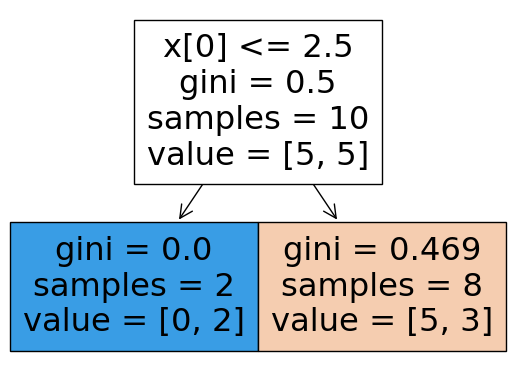

In [242]:
from sklearn.tree import plot_tree
plot_tree(dt1, filled=True)


# from sklearn import tree
# tree.plot_tree(dt1, filled=True)

<Axes: >

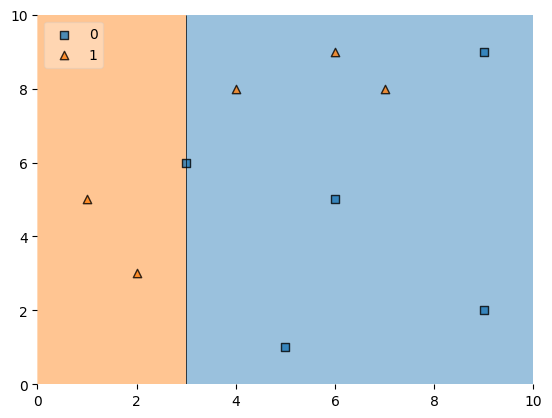

In [243]:
plot_decision_regions(X,y,clf=dt1, legend=2)

In [244]:
df['y_pred']=dt1.predict(X)

In [245]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [246]:
# step 3: 

def performance_of_stump(total_error):
    return 0.5*np.log((1-total_error)/total_error) 

In [247]:
# there are 3 prediction that is wrong: so total error=0.1*3=0.3

alpha1=performance_of_stump(0.3)
alpha1

0.42364893019360184

In [248]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [249]:
# step 4 update weights: 
def update_row_weights(row, alpha=0.423): 
    if row['label']==row['y_pred']: 
        return row['weights']*np.exp(-alpha)
    else: 
        return row['weights']*np.exp(alpha)

In [250]:
df['updated_weights']=df.apply(update_row_weights, axis=1)

In [251]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [252]:
df['updated_weights'].sum()

0.9165153319682015

In [253]:
# step 5 normalize weight and bin assignment: 

df['normalized_weights']=df['updated_weights']/df['updated_weights'].sum()

In [254]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [255]:
df['normalized_weights'].sum()

1.0

In [256]:
# bin assignment: 

df['cumsum_upper']=np.cumsum(df['normalized_weights'])
df['cumsum_lower'] =df['cumsum_upper']-df['normalized_weights']

In [258]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,0,0.065508,0.071475,0.214425,0.142950
3,4,8,1,0.1,0,0.152653,0.166559,0.380983,0.214425
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,0,0.152653,0.166559,0.619017,0.452458
6,6,5,0,0.1,0,0.065508,0.071475,0.690492,0.619017
7,7,8,1,0.1,0,0.152653,0.166559,0.857050,0.690492
8,9,9,0,0.1,0,0.065508,0.071475,0.928525,0.857050
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


In [259]:
df[['X1','X2','label','weights',	'y_pred'	,'updated_weights'	,'normalized_weights' ,'cumsum_lower'	,'cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.071475,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.071475,0.142950,0.214425
3,4,8,1,0.1,0,0.152653,0.166559,0.214425,0.380983
4,5,1,0,0.1,0,0.065508,0.071475,0.380983,0.452458
5,6,9,1,0.1,0,0.152653,0.166559,0.452458,0.619017
6,6,5,0,0.1,0,0.065508,0.071475,0.619017,0.690492
7,7,8,1,0.1,0,0.152653,0.166559,0.690492,0.857050
8,9,9,0,0.1,0,0.065508,0.071475,0.857050,0.928525
9,9,2,0,0.1,0,0.065508,0.071475,0.928525,1.000000


In [260]:
np.random.random()

0.7820133076403711

In [261]:
def create_new_dataset(df):
    indices=[]
    for i in range(df.shape[0]): 
        a=np.random.random()
        for index, row in df.iterrows(): 
            if row['cumsum_upper']>a and a>row['cumsum_lower']: 
                indices.append(index)

    return indices

In [262]:
index_values=create_new_dataset(df)

In [263]:
index_values  # this is upsamplling technique

[1, 6, 8, 1, 1, 4, 6, 5, 9, 8]

In [264]:
second_df=df.iloc[index_values, [0,1,2,3]]

In [265]:
second_df

,X1,X2,label,weights
1,2,3,1,0.1
6,6,5,0,0.1
8,9,9,0,0.1
1,2,3,1,0.1
1,2,3,1,0.1
4,5,1,0,0.1
6,6,5,0,0.1
5,6,9,1,0.1
9,9,2,0,0.1
8,9,9,0,0.1


again follow same steps

In [266]:
dt2=DecisionTreeClassifier(max_depth=1)
X=second_df.iloc[:,0:2].values
y=second_df.iloc[:,2].values
dt2.fit(X,y)

In [268]:
X

array([[2, 3],
       [6, 5],
       [9, 9],
       [2, 3],
       [2, 3],
       [5, 1],
       [6, 5],
       [6, 9],
       [9, 2],
       [9, 9]], dtype=int64)

In [269]:
y

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [270]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 3.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.75, 0.25, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]')]

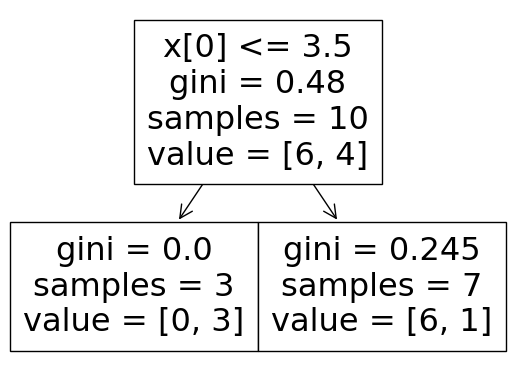

In [271]:
plot_tree(dt2)

<Axes: >

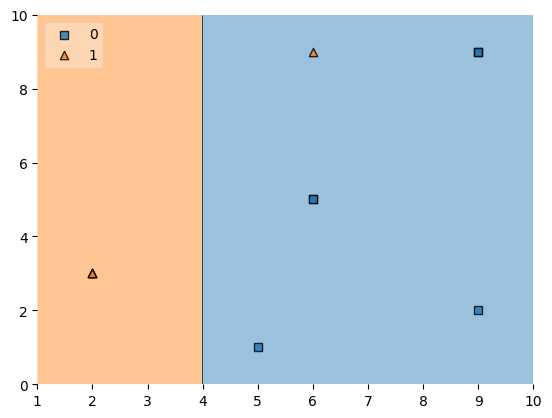

In [272]:
plot_decision_regions(X,y,clf=dt2, legend=2)

In [273]:
second_df['y_pred']=dt2.predict(X)

In [274]:
second_df

,X1,X2,label,weights,y_pred
1,2,3,1,0.1,1
6,6,5,0,0.1,0
8,9,9,0,0.1,0
1,2,3,1,0.1,1
1,2,3,1,0.1,1
4,5,1,0,0.1,0
6,6,5,0,0.1,0
5,6,9,1,0.1,0
9,9,2,0,0.1,0
8,9,9,0,0.1,0


In [275]:
def performance_of_stump(total_error):
    return 0.5*np.log((1-total_error)/total_error) 

In [277]:
alpha2=performance_of_stump(0.1)  # there are 1 mistake

In [278]:
alpha2

1.0986122886681098

In [279]:
def update_row_weights(row, alpha=1.0986): 
    if row['label']==row['y_pred']: 
        return row['weights']*np.exp(-alpha)
    else: 
        return row['weights']*np.exp(alpha)

In [280]:
second_df['updated_weights']=second_df.apply(update_row_weights, axis=1)

In [281]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
1,2,3,1,0.1,1,0.033334
6,6,5,0,0.1,0,0.033334
8,9,9,0,0.1,0,0.033334
1,2,3,1,0.1,1,0.033334
1,2,3,1,0.1,1,0.033334
4,5,1,0,0.1,0,0.033334
6,6,5,0,0.1,0,0.033334
5,6,9,1,0.1,0,0.299996
9,9,2,0,0.1,0,0.033334
8,9,9,0,0.1,0,0.033334


In [282]:
second_df['normalized_weights']=second_df['updated_weights']/second_df['updated_weights'].sum()

In [283]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
1,2,3,1,0.1,1,0.033334,0.055556
6,6,5,0,0.1,0,0.033334,0.055556
8,9,9,0,0.1,0,0.033334,0.055556
1,2,3,1,0.1,1,0.033334,0.055556
1,2,3,1,0.1,1,0.033334,0.055556
4,5,1,0,0.1,0,0.033334,0.055556
6,6,5,0,0.1,0,0.033334,0.055556
5,6,9,1,0.1,0,0.299996,0.499994
9,9,2,0,0.1,0,0.033334,0.055556
8,9,9,0,0.1,0,0.033334,0.055556


In [284]:
second_df['normalized_weights'].sum()

1.0

In [285]:
# bin assignment: 

second_df['cumsum_upper']=np.cumsum(second_df['normalized_weights'])
second_df['cumsum_lower'] =second_df['cumsum_upper']-second_df['normalized_weights']

In [286]:
second_df[['X1','X2','label','weights',	'y_pred'	,'updated_weights'	,'normalized_weights' ,'cumsum_lower'	,'cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_lower,cumsum_upper
1,2,3,1,0.1,1,0.033334,0.055556,0.000000,0.055556
6,6,5,0,0.1,0,0.033334,0.055556,0.055556,0.111112
8,9,9,0,0.1,0,0.033334,0.055556,0.111112,0.166669
1,2,3,1,0.1,1,0.033334,0.055556,0.166669,0.222225
1,2,3,1,0.1,1,0.033334,0.055556,0.222225,0.277781
4,5,1,0,0.1,0,0.033334,0.055556,0.277781,0.333337
6,6,5,0,0.1,0,0.033334,0.055556,0.333337,0.388894
5,6,9,1,0.1,0,0.299996,0.499994,0.388894,0.888888
9,9,2,0,0.1,0,0.033334,0.055556,0.888888,0.944444
8,9,9,0,0.1,0,0.033334,0.055556,0.944444,1.000000


In [287]:
def create_new_dataset(df):
    indices=[]
    for i in range(df.shape[0]): 
        a=np.random.random()
        for index, row in df.iterrows(): 
            if row['cumsum_upper']>a and a>row['cumsum_lower']: 
                indices.append(index)

    return indices

In [288]:
index_values=create_new_dataset(second_df)

In [289]:
index_values

[1, 5, 6, 6, 5, 8, 5, 5, 5, 5]

In [290]:
third_df=df.iloc[index_values, [0,1,2,3]]

In [291]:
third_df

,X1,X2,label,weights
1,2,3,1,0.1
5,6,9,1,0.1
6,6,5,0,0.1
6,6,5,0,0.1
5,6,9,1,0.1
8,9,9,0,0.1
5,6,9,1,0.1
5,6,9,1,0.1
5,6,9,1,0.1
5,6,9,1,0.1


again same step

In [293]:
dt3=DecisionTreeClassifier(max_depth=1)
X=second_df.iloc[:,0:2].values
y=second_df.iloc[:,2].values
dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 3.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.75, 0.25, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]')]

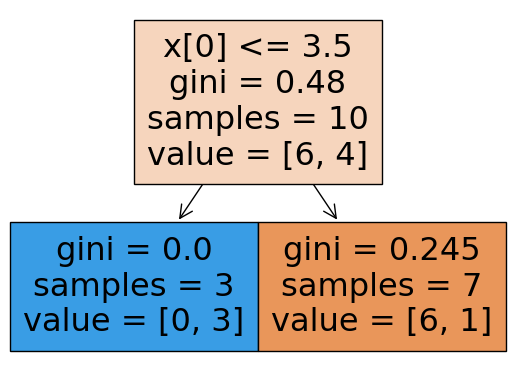

In [295]:
plot_tree(dt3, filled=True)

<Axes: >

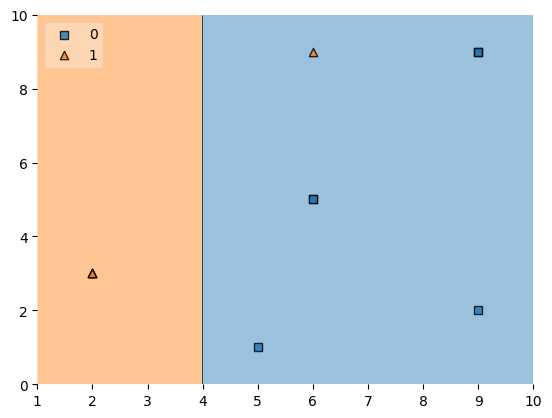

In [296]:
plot_decision_regions(X,y,clf=dt3, legend=2)

In [297]:
third_df['y_pred']=dt3.predict(X)

In [298]:
third_df

,X1,X2,label,weights,y_pred
1,2,3,1,0.1,1
5,6,9,1,0.1,0
6,6,5,0,0.1,0
6,6,5,0,0.1,1
5,6,9,1,0.1,1
8,9,9,0,0.1,0
5,6,9,1,0.1,0
5,6,9,1,0.1,0
5,6,9,1,0.1,0
5,6,9,1,0.1,0


In [299]:
def performance_of_stump(total_error):
    return 0.5*np.log((1-total_error)/total_error) 

alpha3=performance_of_stump(0.6)

In [300]:
alpha3

-0.20273255405408214

In [301]:
print(alpha1, alpha2, alpha3)

0.42364893019360184 1.0986122886681098 -0.20273255405408214


### prediction

In [304]:
np.array([1,5]).reshape(1,2)

array([[1, 5]])

In [305]:
query=np.array([1,5]).reshape(1,2)

In [307]:
query

array([[1, 5]])

In [306]:
dt1.predict(query)

array([1], dtype=int64)

In [308]:
dt2.predict(query)

array([1], dtype=int64)

In [309]:
dt3.predict(query)

array([1], dtype=int64)

In [310]:
alpha1*(1)+alpha2*(1)+alpha3*(1)

1.3195286648076296

In [312]:
np.sign(1.3195)  # output 1

1.0

In [313]:
# for second data points: 
query1=np.array([9,9]).reshape(1,2)

In [314]:
dt1.predict(query1)

array([0], dtype=int64)

In [315]:
dt2.predict(query1)

array([0], dtype=int64)

In [316]:
dt3.predict(query1)

array([0], dtype=int64)

In [317]:
alpha1*(-1)+alpha2*(-1)+alpha3*(-1)

-1.3195286648076296

In [318]:
np.sign(-1.3195)   # -1 means 0 here

-1.0